# Web scraping with BeautifulSoup 

this demo shows how to use BeautifulSoup to crawl job listing in Indeed

In [39]:
## import necessary packaeges
from bs4 import BeautifulSoup
import urllib
import re
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
import numpy as np
import matplotlib.pyplot as plt
import nltk
from collections import Counter
%matplotlib inline

## 1.Reach the link of jobs first 

use indeed mobile web version since its html is simplier

In [2]:
from urllib.request import urlopen
url = "https://www.indeed.com/m/jobs?q=data+scientist&l="
page = urlopen(url)
soup = BeautifulSoup(page)

all_matches = soup.find_all('a',attrs={'rel':['nofollow']})

for i in all_matches:
    print(i['href'])
    print(type(i['href']))
    print("https://www.indeed.com/m/"+i['href'])

viewjob?jk=2e34fe89c64ab97b
<class 'str'>
https://www.indeed.com/m/viewjob?jk=2e34fe89c64ab97b
viewjob?jk=2acd69eb96b82e5e
<class 'str'>
https://www.indeed.com/m/viewjob?jk=2acd69eb96b82e5e
viewjob?jk=1e686166d30fd118
<class 'str'>
https://www.indeed.com/m/viewjob?jk=1e686166d30fd118
viewjob?jk=e2a49c531ce11e26
<class 'str'>
https://www.indeed.com/m/viewjob?jk=e2a49c531ce11e26
viewjob?jk=0f93ade181fb17e8
<class 'str'>
https://www.indeed.com/m/viewjob?jk=0f93ade181fb17e8
viewjob?jk=267e7cf7de2959c7
<class 'str'>
https://www.indeed.com/m/viewjob?jk=267e7cf7de2959c7
viewjob?jk=5f98296a165e5454
<class 'str'>
https://www.indeed.com/m/viewjob?jk=5f98296a165e5454
viewjob?jk=bc85e8b2646da8bd
<class 'str'>
https://www.indeed.com/m/viewjob?jk=bc85e8b2646da8bd
viewjob?jk=3257125e6cc2649e
<class 'str'>
https://www.indeed.com/m/viewjob?jk=3257125e6cc2649e
viewjob?jk=93d36f861d85a9af
<class 'str'>
https://www.indeed.com/m/viewjob?jk=93d36f861d85a9af


### 2.Find the title, company, location and detailed job description for each job 

In [3]:
test_html = \
'''
<html>
	<body>
		<p>
			<b>
				<font size='+1'>Analyst -Data Scientist</font>
			</b>
			<br>The Boston Consulting Group -<span class="location">Los Angeles,CA</span>
		</p>
	</body>
</html>
'''


In [4]:
bs = BeautifulSoup(test_html,'lxml')

In [5]:
print(bs.body.p.b.font.text)

Analyst -Data Scientist


In [6]:
print(bs.body.p.text)



Analyst -Data Scientist

The Boston Consulting Group -Los Angeles,CA



In [7]:
print(bs.body.p.span.text)

Los Angeles,CA


#### Find title, company, location and job description for one postion

In [8]:
title = []
company =[]
location =[]
jd = []
salary_lower =[]
salary_upper =[]
for each in all_matches:
    jd_url = 'http://www.indeed.com/m/'+each['href']
    jd_page = urlopen(jd_url)
    jd_soup = BeautifulSoup(jd_page,'lxml')
    jd_desc = jd_soup.findAll('div',attrs={'id':['desc']})
    title.append(jd_soup.body.p.b.font.text)
    company.append(jd_desc[0].span.text)
    location.append(jd_soup.body.p.span.text)
    jd.append(jd_desc[0].text)
    if(re.search('\$(\d+\,\d+)',jd_soup.body.p.text)):
        salary_lower.append(int(re.search('\$(\d+\,\d+)',jd_soup.body.p.text)[1].replace(',','')))
    else:
        salary_lower.append(None)
    if(re.search('\-\s\$(\d+\,\d+)',jd_soup.body.p.text)):
        salary_upper.append(int(re.search('\-\s\$(\d+\,\d+)',jd_soup.body.p.text)[1].replace(',','')))
    else:
        salary_upper.append(None)
    
    

### Saved the data into Data Frame

In [9]:
job = {'title':title,
      'company':company,
      'location':location,
      'Job Description':jd,
      'salary_lower':salary_lower,
      'salary_upper':salary_upper}
df = pd.DataFrame.from_dict(job)

In [10]:
df

,title,company,location,Job Description,salary_lower,salary_upper
0,Data Scientist 1,Oracle,United States,Data Scientist 1-190018NB\n\n\nDetailed Descri...,NaN,NaN
1,"Entry Level - Data Scientist (Markham, Toronto)",IBM,California,Introduction\nSoftware Developers at IBM are t...,NaN,NaN
2,Entry Level - Associate Data Scientist,IBM,United States,"Introduction\nAs a Data Scientist at IBM, you ...",NaN,NaN
3,Data Scientist Intern (2257),Engie,"Houston, TX","At ENGIE North America, innovation and excelle...",NaN,NaN
4,Data Scientist,10 days ago,"Houston, TX",Re-Invent Technologies is looking for a Data S...,80000.0,120000.0
5,Entry Level Data Scientist,IBM,United States,Introduction\nAt IBM we have an amazing opport...,NaN,NaN
6,Data Scientist,National Security Agency,"Fort Meade, MD",The professionals at the National Security Age...,99172.0,152352.0
7,Data Scientist I,Bank of America,"Richardson, TX 75082",Job Description:\nResponsible for enabling ana...,NaN,NaN
8,Data Analyst / Data Scientist,Ace-Stack,"San Jose, CA",Job Details\nPosition : Data Analyst / Data Sc...,NaN,NaN
9,Data Classification Specialist,Idiomatic,"St. Louis, MO","Today, we live in an experience economy where ...",NaN,NaN


## 3. Change Pages Automatically

In [11]:
title =[]
company =[]
location =[]
jd =[]
salary_lower =[]
salary_upper =[]
url = "https://www.indeed.com/m/jobs?q=data+scientist&l="

#Loop for 50 pages
for i in range(50):
    
    page = urlopen(url)
    soup = BeautifulSoup(page)
    all_matches = soup.findAll(attrs={'rel':['nofollow']})
    for each in all_matches:
        jd_url = "https://www.indeed.com/m/" + each['href']
        jd_page = urlopen(jd_url)
        jd_soup = BeautifulSoup(jd_page,'lxml')
        jd_desc = jd_soup.findAll(attrs={'id':['desc']})
        title.append(jd_soup.body.p.b.font.text)
        company.append(jd_desc[0].span.text)
        location.append(jd_soup.body.p.span.text)
        jd.append(jd_desc[0].text)

        if(re.search('\$\d+\,\d+',jd_soup.body.p.text)):
            salary_lower.append(int(re.search('\$(\d+\,\d+)',jd_soup.body.p.text)[1].replace(',','')))
        else:
            salary_lower.append(None)
        if(re.search('\-\s\$(\d+\,\d+)',jd_soup.body.p.text)):
            salary_upper.append(int(re.search('\-\s\$(\d+\,\d+)',jd_soup.body.p.text)[1].replace(',','')))
        else:
            salary_upper.append(None)  
        
    #change the page to Next
    url_all = soup.findAll(attrs={'rel':['next']})
    url = 'http://www.indeed.com/m/'+ str(url_all[0]['href'])

In [12]:
job = {'title':title,
      'company':company,
      'location':location,
      'jd':jd,
      'salary_lower':salary_lower,
      'salary_upper':salary_upper}
df = pd.DataFrame.from_dict(job)

In [13]:
df.head(50)

,title,company,location,jd,salary_lower,salary_upper
0,Data Scientist 1,Oracle,United States,Data Scientist 1-190018NB\n\n\nDetailed Descri...,NaN,NaN
1,"Entry Level - Data Scientist (Markham, Toronto)",IBM,California,Introduction\nSoftware Developers at IBM are t...,NaN,NaN
2,Entry Level - Associate Data Scientist,IBM,United States,"Introduction\nAs a Data Scientist at IBM, you ...",NaN,NaN
3,Data Scientist Intern (2257),Engie,"Houston, TX","At ENGIE North America, innovation and excelle...",NaN,NaN
4,Data Scientist,10 days ago,"Houston, TX",Re-Invent Technologies is looking for a Data S...,80000.0,120000.0
5,Entry Level Data Scientist,IBM,United States,Introduction\nAt IBM we have an amazing opport...,NaN,NaN
6,Data Scientist,National Security Agency,"Fort Meade, MD",The professionals at the National Security Age...,99172.0,152352.0
7,Data Scientist I,Bank of America,"Richardson, TX 75082",Job Description:\nResponsible for enabling ana...,NaN,NaN
8,Data Analyst / Data Scientist,Ace-Stack,"San Jose, CA",Job Details\nPosition : Data Analyst / Data Sc...,NaN,NaN
9,Data Classification Specialist,Idiomatic,"St. Louis, MO","Today, we live in an experience economy where ...",NaN,NaN


In [14]:
# Remove Zipcode
df['location'] = df['location'].str.replace('\s\d+','')

In [15]:
# Remove City
df['location_state'] = df['location'].str.replace('\w+\,\s','')

In [16]:
df['location_state']

0      United States
1         California
2      United States
3                 TX
4                 TX
5      United States
6            Fort MD
7                 TX
8             San CA
9             St. MO
10            San CA
11                TX
12     United States
13          Sugar TX
14            New NY
15                CA
16          Sugar TX
17                TX
18            New NY
19            New NY
20                TX
21                DC
22                TX
23                TX
24                OH
25                NC
26                CO
27                TX
28            Remote
29                TX
           ...      
470               AZ
471               CA
472               TX
473           Los CA
474               VA
475               CA
476               IL
477       College TX
478          Deer TX
479               NJ
480               TN
481               TX
482               WA
483           San CA
484               TX
485               TX
486    United

In [17]:
df['location_state'] = df['location_state'].str.replace('\w+\s','')
df['location_state'] = df['location_state'].str.replace('\w+\.\s','')

In [18]:
df['location_state']

0          States
1      California
2          States
3              TX
4              TX
5          States
6              MD
7              TX
8              CA
9              MO
10             CA
11             TX
12         States
13             TX
14             NY
15             CA
16             TX
17             TX
18             NY
19             NY
20             TX
21             DC
22             TX
23             TX
24             OH
25             NC
26             CO
27             TX
28         Remote
29             TX
          ...    
470            AZ
471            CA
472            TX
473            CA
474            VA
475            CA
476            IL
477            TX
478            TX
479            NJ
480            TN
481            TX
482            WA
483            CA
484            TX
485            TX
486        States
487            NY
488            NY
489            DC
490            MO
491            PA
492            UT
493            NE
494       

In [19]:
# Unique locations
unique_location_state = [np.unique(df['location_state'])]
unique_location_state

[array(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'California', 'DC', 'DE', 'FL',
        'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'LA', 'MA', 'MD', 'MI',
        'MN', 'MO', 'MT', 'NC', 'NE', 'NJ', 'NM', 'NY', 'OH', 'OR',
        'Oklahoma', 'PA', 'PR', 'Remote', 'States', 'TN', 'TX', 'Texas',
        'UT', 'VA', 'VT', 'Virginia', 'WA'], dtype=object)]

In [20]:
# Clean state name
df['location_state'] = df['location_state'].str.replace('Texas','TX')
df['location_state'] = df['location_state'].str.replace('Remote','States')
df['location_state'] = df['location_state'].str.replace('Oklahoma','OK')
df['location_state'] = df['location_state'].str.replace('Virginia','VA')
df['location_state'] = df['location_state'].str.replace('Louisiana','LA')
df['location_state'] = df['location_state'].str.replace('California','CA')

In [21]:
unique_location_state = np.unique(df['location_state'])
unique_location_state

array(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'LA', 'MA', 'MD', 'MI', 'MN', 'MO',
       'MT', 'NC', 'NE', 'NJ', 'NM', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR',
       'States', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA'], dtype=object)

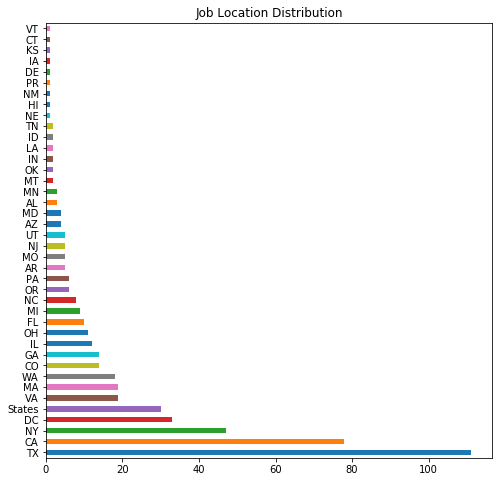

In [22]:
# Visuallize job distribution at each state
df['location_state'].value_counts().plot(kind='barh',title='Job Location Distribution',figsize=(8,8))


In [23]:
salary_lower = [ i for i in df['salary_lower'].dropna()]
print(len(salary_lower))
salary_upper = [i for i in df['salary_upper'].dropna()]
print(len(salary_upper))
salary = salary_lower + salary_upper
print(len(salary))
print(salary)

68
60
128
[80000.0, 99172.0, 100639.0, 4339.0, 70303.0, 81078.0, 80000.0, 57510.0, 90000.0, 200000.0, 117191.0, 55000.0, 67968.0, 110000.0, 67968.0, 110000.0, 105039.0, 90000.0, 90000.0, 90000.0, 80000.0, 66810.0, 67956.0, 90000.0, 74596.0, 65000.0, 150000.0, 50400.0, 88704.0, 150000.0, 117191.0, 80000.0, 99172.0, 52524.0, 4476.0, 100000.0, 75000.0, 135000.0, 150000.0, 50000.0, 1000.0, 85000.0, 100000.0, 75900.0, 50000.0, 108936.0, 1000.0, 80000.0, 47986.0, 4599.0, 137849.0, 130000.0, 110000.0, 117400.0, 145000.0, 50000.0, 150000.0, 80000.0, 50000.0, 137849.0, 68344.0, 110231.0, 58000.0, 115000.0, 90000.0, 77382.0, 65000.0, 30000.0, 120000.0, 152352.0, 129646.0, 107103.0, 129709.0, 110000.0, 128920.0, 150000.0, 350000.0, 152352.0, 60000.0, 126062.0, 140000.0, 126062.0, 140000.0, 166500.0, 150000.0, 139500.0, 150000.0, 100000.0, 89565.0, 105890.0, 150000.0, 128920.0, 75500.0, 175000.0, 104000.0, 115313.0, 175000.0, 152352.0, 150000.0, 128920.0, 79000.0, 8097.0, 200000.0, 120000.0, 14000

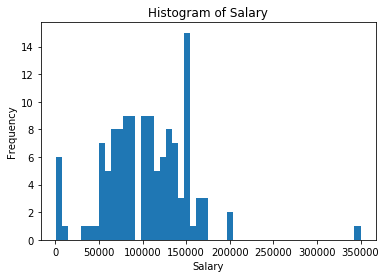

In [24]:
# visualize salary distribution
plt.hist(salary,bins = 50)
plt.title('Histogram of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

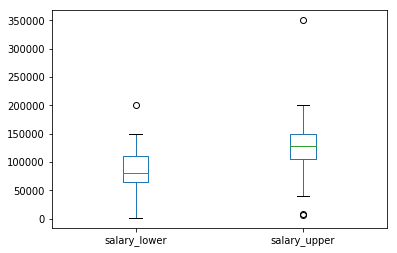

In [25]:
# to visualize the outliers
df.plot(kind='box')

In [26]:
# gathered all the job descriptions in a string and change into lowercase
jobDescription = ""
for jd in df['jd']:
    jobDescription = jobDescription + "\n" + jd
jobDescription = jobDescription.lower()

jobDescription

'\ndata scientist 1-190018nb\n\n\ndetailed description and job requirements\n\ndesigns, develops and programs methods, processes, and systems to consolidate and analyze unstructured, diverse “big data” sources to generate actionable insights and solutions for client services and product enhancement.\n\ninteracts with product and service teams to identify questions and issues for data analysis and experiments. develops and codes software programs, algorithms and automated processes to cleanse, integrate and evaluate large datasets from multiple disparate sources. identifies meaningful insights from large data and metadata sources; interprets and communicates insights and findings from analysis and experiments to product, service, and business managers.\n\nwork involves some problem solving with assistance and guidance in understanding and applying company policies and procedures. attention to detail critical. ability to collect, organize, and display data in spreadsheet format. follow-t

In [27]:
# tokenize the job descriptions
tokens = word_tokenize(jobDescription)
tokens

['data',
 'scientist',
 '1-190018nb',
 'detailed',
 'description',
 'and',
 'job',
 'requirements',
 'designs',
 ',',
 'develops',
 'and',
 'programs',
 'methods',
 ',',
 'processes',
 ',',
 'and',
 'systems',
 'to',
 'consolidate',
 'and',
 'analyze',
 'unstructured',
 ',',
 'diverse',
 '“',
 'big',
 'data',
 '”',
 'sources',
 'to',
 'generate',
 'actionable',
 'insights',
 'and',
 'solutions',
 'for',
 'client',
 'services',
 'and',
 'product',
 'enhancement',
 '.',
 'interacts',
 'with',
 'product',
 'and',
 'service',
 'teams',
 'to',
 'identify',
 'questions',
 'and',
 'issues',
 'for',
 'data',
 'analysis',
 'and',
 'experiments',
 '.',
 'develops',
 'and',
 'codes',
 'software',
 'programs',
 ',',
 'algorithms',
 'and',
 'automated',
 'processes',
 'to',
 'cleanse',
 ',',
 'integrate',
 'and',
 'evaluate',
 'large',
 'datasets',
 'from',
 'multiple',
 'disparate',
 'sources',
 '.',
 'identifies',
 'meaningful',
 'insights',
 'from',
 'large',
 'data',
 'and',
 'metadata',
 'sour

In [35]:
# remove the stop words and puntuations
stop = list(stopwords.words('english') ) + list(string.punctuation)
tokens = [t for t in tokens if t not in stop]
tokens

['data',
 'scientist',
 '1-190018nb',
 'detailed',
 'description',
 'job',
 'requirements',
 'designs',
 'develops',
 'programs',
 'methods',
 'processes',
 'systems',
 'consolidate',
 'analyze',
 'unstructured',
 'diverse',
 '“',
 'big',
 'data',
 '”',
 'sources',
 'generate',
 'actionable',
 'insights',
 'solutions',
 'client',
 'services',
 'product',
 'enhancement',
 'interacts',
 'product',
 'service',
 'teams',
 'identify',
 'questions',
 'issues',
 'data',
 'analysis',
 'experiments',
 'develops',
 'codes',
 'software',
 'programs',
 'algorithms',
 'automated',
 'processes',
 'cleanse',
 'integrate',
 'evaluate',
 'large',
 'datasets',
 'multiple',
 'disparate',
 'sources',
 'identifies',
 'meaningful',
 'insights',
 'large',
 'data',
 'metadata',
 'sources',
 'interprets',
 'communicates',
 'insights',
 'findings',
 'analysis',
 'experiments',
 'product',
 'service',
 'business',
 'managers',
 'work',
 'involves',
 'problem',
 'solving',
 'assistance',
 'guidance',
 'understand

In [43]:
# count the frequency on tokens
token_counts = nltk.FreqDist(tokens)
token_counts.most_common(30)

[('data', 4650),
 ('experience', 2039),
 ('work', 1373),
 ('business', 1316),
 ('science', 1064),
 ('’', 1000),
 ('team', 967),
 ('analysis', 809),
 ('skills', 776),
 ('analytics', 759),
 ('learning', 738),
 ('required', 666),
 ('information', 615),
 ('years', 609),
 ('new', 599),
 ('position', 597),
 ('must', 574),
 ('statistical', 567),
 ('machine', 557),
 ('scientist', 550),
 ('ability', 543),
 ('--', 525),
 ('models', 515),
 ('research', 509),
 ('ago', 505),
 ('knowledge', 488),
 ('working', 483),
 ('including', 478),
 ('job', 472),
 ('development', 468)]

In [46]:
bgs = nltk.bigrams(tokens)

skill_counts = nltk.FreqDist(bgs)
skill_counts.most_common(20)

[(('data', 'science'), 616),
 (('machine', 'learning'), 535),
 (('data', 'scientist'), 474),
 (('--', '--'), 428),
 (('days', 'ago'), 360),
 (('computer', 'science'), 230),
 (('data', 'sets'), 219),
 (('years', 'experience'), 207),
 (('data', 'analysis'), 190),
 (('data', 'scientists'), 175),
 (('big', 'data'), 142),
 (('communication', 'skills'), 131),
 (('sexual', 'orientation'), 130),
 (('equal', 'opportunity'), 130),
 (('national', 'origin'), 129),
 (('data', 'mining'), 129),
 (('30+', 'days'), 128),
 (('data', 'analytics'), 128),
 (('experience', 'data'), 127),
 (('gender', 'identity'), 121)]

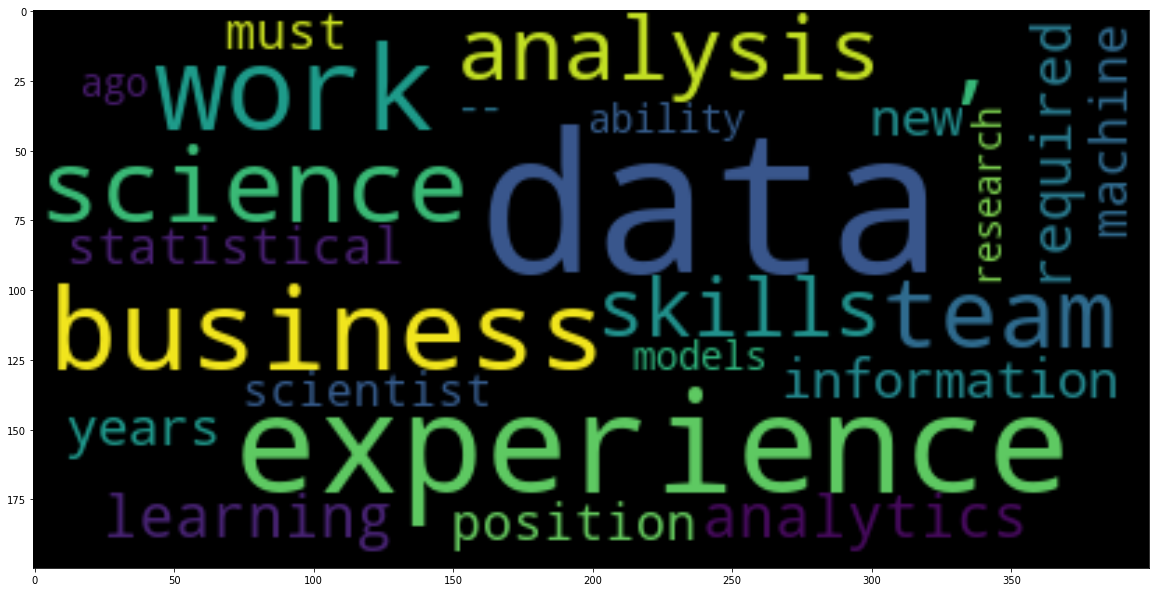

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

w = dict(token_counts.most_common(25))

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(w)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud,interpolation="bilinear")
plt.show()